In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# data file paths
property_assessments = pd.read_csv('allegney_county_assesment.csv', engine='python')
data_dictionary = pd.read_csv('allegney_county_data_dictionary.csv', engine='python')

# Allegheny County Property Assessments

## Overview

### Business Problem
Create a dynamic pricing tool that will predict the actual land parcel sale price, given all the features of a parcel and some key factors that affect real estate prices. In addition, we aim to add a comparative market analysis to the dynamic pricing model.

We see this providing value to individuals looking to sell their home as follows:
- help home sellers evaluate local relators
- increase home sellers' confidence in setting the price of their home without a relator

## Dataset

**Title:** Allegheny County Property Assessments

**Source:** Allegheny County, hosted by The Western Pennsylvania Regional Data Center.

**Link:** https://data.wprdc.org/dataset/property-assessments

**Allegheny County Property Assessment Data User Guide:**

https://docs.google.com/document/d/1eYuJOh4_CBitclhhgeJv6iLStPjtouhXV1_2cwei_-s

**License:** Creative Commons CCZero

**General Description**:

From the The Western Pennsylvania Regional Data Center website:
<blockquote source='https://data.wprdc.org/dataset/property-assessments'>
Real Property parcel characteristics for Allegheny County, PA. Includes information pertaining to land, values, sales, abatements, and building characteristics (if residential) by parcel. Disclaimer: Parcel information is provided from the Office of Property Assessments in Allegheny County. Content and availability are subject to change. Please review the Data Dictionary for details on included fields before each use. Property characteristics and values change due to a variety of factors such as court rulings, municipality permit processing and subdivision plans. Consequently the assessment system parcel data is continually changing. Please take the dynamic nature of this information into consideration before using it. Excludes name and contact information for property owners, as required by Ordinance 3478-07.
</blockquote>
Allegheny County is located in Pennsylvania (see map below created by David Benbennick with Public domain license, hosted by Wikimedia Commons).

<a title="David Benbennick / Public domain" href="https://commons.wikimedia.org/wiki/File:Map_of_Pennsylvania_highlighting_Allegheny_County.svg"><img width="300" alt="Map of Pennsylvania highlighting Allegheny County" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Map_of_Pennsylvania_highlighting_Allegheny_County.svg/512px-Map_of_Pennsylvania_highlighting_Allegheny_County.svg.png"></a>

**Dataset Fields**

<table style="width:70%; text-align: left;">
    <caption>Field Definitions from Data Dictionary</caption>
    <th>Field Name</th><th>Field Description</th>
    <tr><td>PARID</td><td>Parcel Identification Number</td></tr>
    <tr><td>PROPERTYHOUSENUM</td><td>Property Location House Number</td></tr>
    <tr><td>PROPERTYFRACTION</td><td>Property Location House Number Fraction</td></tr>
    <tr><td>PROPERTYADDRESS</td><td>Property Location Street Name</td></tr>
    <tr><td>PROPERTYCITY</td><td>Property Location City Name</td></tr>
    <tr><td>PROPERTYSTATE Property</td><td>Location State Name</td></tr>
    <tr><td>PROPERTYUNIT</td><td>Property Location Unit Number</td></tr>
    <tr><td>PROPERTYZIP</td><td>Property Location Zip code, first 5 digits</td></tr>
    <tr><td>MUNICODE</td><td>Municipality Code (Tax District)</td></tr>
    <tr><td>MUNIDESC</td><td>Municipality Name</td></tr>
    <tr><td>SCHOOLCODE</td><td>School District Code</td></tr>
    <tr><td>SCHOOLDESC</td><td>School District Name</td></tr>
    <tr><td>LEGAL1</td><td>Legal Description 1</td></tr>
    <tr><td>LEGAL2</td><td>Legal Description 2</td></tr>
    <tr><td>LEGAL3</td><td>Legal Description 3</td></tr>
    <tr><td>NEIGHCODE</td><td>Neighborhood Number</td></tr>
    <tr><td>NEIGHDESC</td><td>Neighborhood Name</td></tr>
    <tr><td>TAXCODE</td><td>Tax Status</td></tr>
    <tr><td>TAXDESC</td><td>Tax Status Description</td></tr>
    <tr><td>TAXSUBCODE</td><td>Tax Sub Code (applies to PURTA only)</td></tr>
    <tr><td>TAXSUBCODE_DESC</td><td>Tax Sub Code Description</td></tr>
    <tr><td>OWNERCODE</td><td>Owner Type Code 1</td></tr>
    <tr><td>OWNERDESC</td><td>Owner Description</td></tr>
    <tr><td>CLASS</td><td>Class</td></tr>
    <tr><td>CLASSDESC</td><td>Class Description</td></tr>
    <tr><td>USECODE</td><td>Land Use Code</td></tr>
    <tr><td>USEDESC</td><td>Land Use Code Description </td></tr>
    <tr><td>LOTAREA</td><td>Sum of Area of Land</td></tr>
    <tr><td>HOMESTEADFLAG</td><td>Homestead Flag</td></tr>
    <tr><td>CLEANGREEN</td><td>Clean and Green Flag</td></tr>
    <tr><td>FARMSTEADFLAG</td><td>Farmstead Flag</td></tr>
    <tr><td>ABATEMENTFLAG</td><td>Abatement Flag</td></tr>
    <tr><td>RECORDDATE</td><td>Record Date</td></tr>
    <tr><td>SALEDATE</td><td>Sale Date</td></tr>
    <tr><td>SALEPRICE</td><td>Sale Price</td></tr>
    <tr><td>SALECODE</td><td>Sale Validity Code</td></tr>
    <tr><td>SALEDESC</td><td>Sale Validity Code Description</td></tr>
    <tr><td>DEEDBOOK</td><td>Book Number</td></tr>
    <tr><td>DEEDPAGE</td><td>Page Number</td></tr>
    <tr><td>PREVSALEDATE</td><td>Previous Sale Date</td></tr>
    <tr><td>PREVSALEPRICE</td><td>Previous Sale Price</td></tr>
    <tr><td>PREVSALEDATE2</td><td>Previous Sale Date 2</td></tr>
    <tr><td>PREVSALEPRICE2</td><td>Previous Sale Price 2</td></tr>
    <tr><td>CHANGENOTICEADDRESS1</td><td>Change Notice Full Address 1</td></tr>
    <tr><td>CHANGENOTICEADDRESS2</td><td>Change Notice Full Address 2</td></tr>
    <tr><td>CHANGENOTICEADDRESS3</td><td>Change Notice Full Address 3</td></tr>
    <tr><td>CHANGENOTICEADDRESS4</td><td>Change Notice Full Address 4</td></tr>
    <tr><td>COUNTYBUILDING</td><td>County Assessed Value for Building </td></tr>
    <tr><td>COUNTYLAND</td><td>County Assessed Value for Land</td></tr>
    <tr><td>COUNTYTOTAL</td><td>County Assessed Value Total</td></tr>
    <tr><td>COUNTYEXEMPTBLDG</td><td>County Exempt Building Amount</td></tr>
    <tr><td>LOCALBUILDING</td><td>Local Assessed Value for Building </td></tr>
    <tr><td>LOCALLAND</td><td>Local Assessed Value for Land</td></tr>
    <tr><td>LOCALTOTAL</td><td>Local Assessed Value Total</td></tr>
    <tr><td>FAIRMARKETBUILDING</td><td>Fair Market Building Value</td></tr>
    <tr><td>FAIRMARKETLAND</td><td>Fair Market Land Value</td></tr>
    <tr><td>FAIRMARKETTOTAL</td><td>Fair Market Total Value</td></tr>
    <tr><td>STYLE</td><td>Dwelling - Architectural Style</td></tr>
    <tr><td>STYLEDESC</td><td>Dwelling - Architectural Style Description</td></tr>
    <tr><td>STORIES</td><td>Dwelling - Number of Stories</td></tr>
    <tr><td>YEARBLT</td><td>Dwelling - Year Built</td></tr>
    <tr><td>EXTERIORFINISH</td><td>Dwelling - Exterior Wall code</td></tr>
    <tr><td>EXTFINISH_DESC</td><td>Dwelling - Exterior Wall Description</td></tr>
    <tr><td>ROOF</td><td>Dwelling - Roof</td></tr>
    <tr><td>ROOFDESC</td><td>Dwelling - Roof Description</td></tr>
    <tr><td>BASEMENT</td><td>Dwelling - Basement</td></tr>
    <tr><td>BASEMENTDESC</td><td>Dwelling - Basement Description</td></tr>
    <tr><td>GRADE</td><td>Dwelling - Grade</td></tr>
    <tr><td>GRADEDESC</td><td>Dwelling - Grade Description</td></tr>
    <tr><td>CONDITION</td><td>Dwelling - Condition</td></tr>
    <tr><td>CONDITIONDESC</td><td>Dwelling - Condition Description</td></tr>
    <tr><td>CDU</td><td>Dwelling - CDU</td></tr>
    <tr><td>CDUDESC</td><td>Dwelling - CDU Description</td></tr>
    <tr><td>TOTALROOMS</td><td>Dwelling - Total Rooms</td></tr>
    <tr><td>BEDROOMS</td><td>Dwelling - Bedrooms</td></tr>
    <tr><td>FULLBATHS</td><td>Dwelling - Full Baths</td></tr>
    <tr><td>HALFBATHS</td><td>Dwelling - Half Baths</td></tr>
    <tr><td>HEATINGCOOLING</td><td>Dwelling - Heating Cooling</td></tr>
    <tr><td>HEATINGCOOLINGDESC</td><td>Dwelling - Heating Cooling Description</td></tr>
    <tr><td>FIREPLACES</td><td>Dwelling - Number of Wood burning Fireplaces Stacks</td></tr>
    <tr><td>BSMTGARAGE</td><td>Dwelling - Integral Basement Garage (Number of Cars)</td></tr>
    <tr><td>FINISHEDLIVINGAREA</td><td>Dwelling - Total Square Feet of Living Area</td></tr>
    <tr><td>CARDNUMBER</td><td>Dwelling - Building (card) Number</td></tr>
    <tr><td>ALT_ID</td><td>Alternate Parcel Identification Number</td></tr>
    <tr><td>TAXYEAR</td><td>The current certified tax year</td></tr>
    <tr><td>ASOFDATE</td><td>The run date of this file</td></tr>
</table>

## Future Steps:
- Further data exploration and feature engineering
    - Find redundant or useless features
    - Scale and encode features as appropiate
    - Create new features as needed
    - If we need new data sources, we can merge our data with a number of other dataset found at [The Western Pennsylvania Regional Data Center](https://data.wprdc.org/dataset).
- Create clusters of parcels for each zipcode, then use the cluster number for a parcel in a regression anaylsis for that zipcode. For each zipcode, will plan on tuning hyperparameters with methods like GridSearch.

In [9]:
"There are {} fields in this dataset.".format(len(property_assessments.columns))

'There are 86 fields in this dataset.'

In [10]:
property_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580526 entries, 0 to 580525
Data columns (total 86 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PARID                 580526 non-null  object 
 1   PROPERTYHOUSENUM      580473 non-null  float64
 2   PROPERTYFRACTION      580526 non-null  object 
 3   PROPERTYADDRESS       580526 non-null  object 
 4   PROPERTYCITY          580524 non-null  object 
 5   PROPERTYSTATE         580526 non-null  object 
 6   PROPERTYUNIT          580526 non-null  object 
 7   PROPERTYZIP           580525 non-null  float64
 8   MUNICODE              580526 non-null  int64  
 9   MUNIDESC              580526 non-null  object 
 10  SCHOOLCODE            580526 non-null  int64  
 11  SCHOOLDESC            580526 non-null  object 
 12  LEGAL1                580506 non-null  object 
 13  LEGAL2                516362 non-null  object 
 14  LEGAL3                337723 non-null  object 
 15  

In [11]:
"There are {} unique parcel ids in this dataset".format(len(property_assessments.PARID.unique()))

'There are 580526 unique parcel ids in this dataset'

In [12]:
"The maximum sales price is {} and the min sales price is {}".format(property_assessments.SALEPRICE.max(), property_assessments.SALEPRICE.min())

'The maximum sales price is 179395660.0 and the min sales price is 0.0'

In [13]:
"There are {} different unique sale price values".format(len(property_assessments.SALEPRICE.value_counts()))

'There are 33862 different unique sale price values'

In [14]:
sales_over_ten_thousand = property_assessments[property_assessments.SALEPRICE > 10000]
sales_over_twenty_thousand = property_assessments[property_assessments.SALEPRICE > 20000]
print("There are {} sales over $10,000".format(len(sales_over_ten_thousand)))
print("There are {} sales over $20,000".format(len(sales_over_twenty_thousand)))

There are 347346 sales over $10,000
There are 324493 sales over $20,000


In [15]:
'There are {} unique zipcodes in this dataset'.format(len(property_assessments.PROPERTYZIP.unique()))

'There are 123 unique zipcodes in this dataset'

In [16]:
property_assessments.groupby(['PROPERTYZIP']).count()

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,MUNICODE,MUNIDESC,SCHOOLCODE,...,HALFBATHS,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,ALT_ID,TAXYEAR,ASOFDATE
PROPERTYZIP,,,,,,,,,,,,,,,,,,,,,
15003.0,480,480,480,480,480,480,480,480,480,480,...,332,338,338,325,333,338,338,0,480,480
15005.0,465,465,465,465,465,465,465,465,465,465,...,303,308,308,287,271,308,308,403,465,465
15006.0,157,157,157,157,157,157,157,157,157,157,...,133,136,136,128,133,136,136,0,157,157
15007.0,182,182,182,182,182,182,182,182,182,182,...,123,124,124,120,120,124,124,0,182,182
15012.0,24,24,24,24,24,24,24,24,24,24,...,8,8,8,7,7,8,8,0,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668.0,32,32,32,32,32,32,32,32,32,32,...,31,31,31,27,30,31,31,0,32,32
16046.0,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,...,1128,1135,1135,491,639,1138,1138,727,1427,1427
16056.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,0,3,3


In [17]:
parcels_per_zipcode = property_assessments.PROPERTYZIP.value_counts()

In [18]:
"The most parcels in a zipcode is {}, the least amount of parcels in a zipcode is {}.".format(parcels_per_zipcode.max(), parcels_per_zipcode.min())

'The most parcels in a zipcode is 18326, the least amount of parcels in a zipcode is 1.'

In [19]:
parcels_per_zipcode.describe()

count      122.000000
mean      4758.401639
std       4621.356963
min          1.000000
25%        512.750000
50%       3730.500000
75%       7486.750000
max      18326.000000
Name: PROPERTYZIP, dtype: float64

In [20]:
"There are {} unique Municipalities." .format(len(property_assessments.MUNICODE.unique()))

'There are 175 unique Municipalities.'

In [21]:
"There are {} unique School Districts." .format(len(property_assessments.SCHOOLCODE.unique()))

'There are 46 unique School Districts.'

In [22]:
"There are {} unique Neighborhoods." .format(len(property_assessments.NEIGHCODE.unique()))

'There are 1000 unique Neighborhoods.'

> **Data feature - "Class"**

 >> Broad self-explanatory categories for describing the  general use of a parcel.
Categories:  
- R - RESIDENTIAL
- U - UTILITIES
- I - INDUSTRIAL
- C - COMMERCIAL
- O - OTHER
- G - GOVERNMENT
- F - AGRICULTURAL

In [23]:
"There are {} unique Classes of Property." .format(len(property_assessments.CLASS.unique()))

'There are 7 unique Classes of Property.'

In [24]:
#Displaying Types of Values - Also denotes whether there are nan values
property_assessments.CLASS.unique()

array(['C', 'R', 'G', 'O', 'U', 'I', 'F'], dtype=object)

In [25]:
#Percentages for each class of parcel
round(property_assessments.groupby(by='CLASS')['PARID'].count()/len(property_assessments)*100,2)

CLASS
C     6.25
F     0.41
G     2.94
I     0.64
O     0.13
R    89.29
U     0.34
Name: PARID, dtype: float64

 > **Data feature - "HOMESTEADFLAG"**

 > >[Tax Code Resource](https://dced.pa.gov/local-government/property-tax-relief-homestead-exclusion/)

> > Homestead designation is denoted by this feature; this allows the given property to qualify for a tax reduction through the decreasing the property evaulation prior to computing property tax.

In [26]:
#Displaying Possible Values
#property_assessments.HOMESTEADFLAG.unique()

In [27]:
#Checking for Duplicate PARID Values
"There are {} unique Parcel IDs where there are {} entries within the dataset."\
.format(len(property_assessments.PARID.unique()),len(property_assessments))

'There are 580526 unique Parcel IDs where there are 580526 entries within the dataset.'

In [28]:
"{}% of Parcels are Classified as Homesteads"\
.format(round(list(property_assessments.groupby(by = 'HOMESTEADFLAG')['PARID'].count())[0]/len(property_assessments)*100,2))

'52.61% of Parcels are Classified as Homesteads'

> **Data feature - "CLEANGREEN"**

>> [Tax Code Resource](https://conservationtools.org/guides/44-clean-and-green)

>> Cleangreen designation is denoted by this feature; this allows the given property to qualify for a tax reduction based on helping improve farmers bottom land.  The three types of land that can qualify for this designation are specified in above linked resource (Centered Around Agricultural Land).


In [29]:
#Displaying Possible Values
#property_assessments.CLEANGREEN.unique()

In [30]:
"{}% of Parcels are Classified as Cleangreen"\
.format(round(list(property_assessments.groupby(by = 'CLEANGREEN')['PARID'].count())[0]/len(property_assessments)*100,2))

'0.29% of Parcels are Classified as Cleangreen'

> **Data feature - "FARMSTEADFLAG"**

>> [Tax Code Resource](https://extension.psu.edu/understanding-the-homestead-and-farmstead-exclusions)

>> Farmstead designation is denoted by this feature; this allows the given property to qualify for a tax reducation through the decreasing of the respective properties valuation prior to computing property tax owed.

In [31]:
#Displaying Possible Values
property_assessments.FARMSTEADFLAG.unique()

array([nan, 'FRM'], dtype=object)

In [32]:
"{}% of Parcels are Classified as Farmsteads"\
.format(round(list(property_assessments.groupby(by = 'FARMSTEADFLAG')['PARID'].count())[0]/len(property_assessments)*100,2))

'0.0% of Parcels are Classified as Farmsteads'

# Baseline Model
We'll build a baseline model to see how it performs. Anything that we build after, should be able to beat our baseline.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [167]:
# Split Data into Features and Values.
property_assessments = property_assessments.dropna(subset = ['SALEPRICE'])

X = property_assessments.loc[:,property_assessments.columns != 'SALEPRICE']
X = X.select_dtypes(include=['bool','number','int','float'])
X = X.dropna(axis=1, how='any')

y = property_assessments['SALEPRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
clf = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

rmse = mean_squared_error(y_test, predictions) ** 0.5
print("Baseline Root Mean Squared Error: ", rmse)

Baseline Root Mean Squared Error:  910303.8478624838


In [169]:
predictions[:5]

array([ 46525.45990598, 188792.18253381,  81482.89861551,  97003.54113217,
        36532.94635392])

In [170]:
y_test[:5]

127206         0.0
578242    279000.0
176441     12500.0
293379    178000.0
213573     30000.0
Name: SALEPRICE, dtype: float64

These results are bad. We can do better in the future hopefully.

# Clustering

In [35]:
from sklearn.cluster import KMeans

In [162]:
from kneed import KneeLocator

def run_clustering(data):
    """Run Clustering on a given DataFrame, and append those clusters to the DataFrame.
    PARAMS:
        data: DataFrame - Represents a DataFrame that we want to run clustering on.
    Returns:
        DataFrame - DataFrame with clusters concatenated in it. 
    """
    # Fitting multiple k-means algorithms and storing the values in an empty list
    inertia_values = []
    NumClusters  =[*range(1, 20)]

    for cluster in range(1,20):
        kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    # Converting the results into a dataframe and plotting them
    frame = pd.DataFrame({'Cluster':range(1,20), 'inertia_values':inertia_values})
    plt.figure(figsize=(12,6))
    plt.plot(frame['Cluster'], frame['inertia_values'], marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

    kneedle = KneeLocator(NumClusters, inertia_values, curve='convex', direction='decreasing')
    cluster_count = kneedle.elbow
    
    plt.vlines([cluster_count], ymin=min(inertia_values), ymax=max(inertia_values))
    plt.plot()
    plt.show()
    
    print("Number of Clusters: ", cluster_count)
    
    # Run Kmeans with Number of Clusters determined by Elbow Method
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster_count, init='k-means++')
    kmeans.fit(data)
    pred = kmeans.labels_
    
    # Update DataFrame with Cluster Information
    final_columns = data.columns.tolist() + ['CLUSTER'] 
    data = data.reset_index(drop=True)
    data = pd.concat([data, pd.Series(pred)], axis=1, ignore_index=True)
    data.columns = final_columns
        
    return data

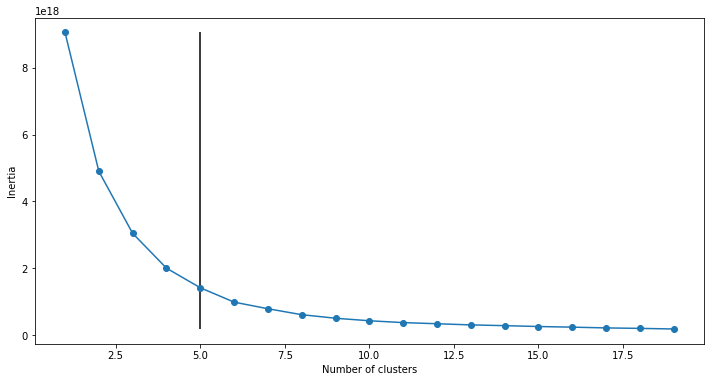

Number of Clusters:  5


In [163]:
results = run_clustering(X_train)

In [164]:
results.head()

,MUNICODE,SCHOOLCODE,OWNERCODE,USECODE,LOTAREA,COUNTYBUILDING,COUNTYLAND,COUNTYTOTAL,COUNTYEXEMPTBLDG,LOCALBUILDING,LOCALLAND,LOCALTOTAL,FAIRMARKETBUILDING,FAIRMARKETLAND,FAIRMARKETTOTAL,TAXYEAR,CLUSTER
0,124,47,10,100,1800,0,3200,3200,0,0,3200,3200,0,3200,3200,2020,0
1,930,14,10,60,2457,41800,13000,54800,0,59800,13000,72800,59800,13000,72800,2020,0
2,115,47,10,10,2250,62400,32600,95000,0,62400,32600,95000,62400,32600,95000,2020,0
3,822,9,10,10,1675,8000,2700,10700,0,26000,2700,28700,26000,2700,28700,2020,0
4,836,32,12,10,12209,92800,23700,116500,0,110800,23700,134500,110800,23700,134500,2020,0


In [165]:
results.shape

(382362, 17)

In [166]:
results['CLUSTER'].value_counts()

0    381858
4       439
2        59
1         5
3         1
Name: CLUSTER, dtype: int64

# Model Build
Below is a function for building a model and performing randomized GridSearch. Ideally, we will use this function for each zip code (could probably paraellize it).

In [200]:
from sklearn.model_selection import RandomizedSearchCV

# List of models we want to test.

In [205]:
def test_model(model_choice, params, X_train, y_train, model_name):
    """Trains model, and evaluates it.
        PARAMS:
            model_choice - SKLearn Model: Model to be trained
            params - dictionary: Dictionary of parameters to feed the model
            X_train - DataFrame: Training Data, Features
            y_train - DataFrame: Training Data, Targets
            X_test - DataFrame: Testing Data, Features
            y_test - DataFrame: Testing Data, Targets
        
        RETURNS:
            rmse - float: Root Mean Squared Error for specified model and parameters. 
    """
    # Run RandomizedSearch instead of GridSearch to conserve time. 
    # If Time, we can run GridSearch on the final models?
    # Really small search space. To increase, update n_iter to a higher number. 
    # To get more reliable results, increase cv to a higher number.
    clf = RandomizedSearchCV(model_choice(), params, cv=3, n_iter=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
    clf.fit(X_train, y_train)
    
    best_parameters = clf.best_params_
    best_score = clf.best_score_ * -1
    
    print(f"Root Mean Squared Error for {model_name}: ", best_score)
    
    return (best_score, model_name, best_parameters)

In [207]:
GBR_Param_Space = {
    'learning_rate':[0.01,0.1],
    'n_estimators':[50,100,150],
    'subsample':[0.5,0.7,1.0],
    'max_depth':[3,6],
    'alpha':[0.7,0.9]
}

models_to_test = [(GradientBoostingRegressor, GBR_Param_Space, "GradientBoostingRegressor")]

results = []

for model in models_to_test:
    results += [test_model(model[0], model[1], X_train, y_train, model[2])]
    
# Sort results by the best rmse.
results.sort(key = lambda x: x[0])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.9min remaining: 12.1min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.9min remaining: 10.6min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  5.9min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  7.3min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.4min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.7min finished


Root Mean Squared Error for GradientBoostingRegressor:  730900.2407372197


In [208]:
print(results)

[(730900.2407372197, 'GradientBoostingRegressor', {'subsample': 0.7, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.01, 'alpha': 0.7})]


# Next Steps
We should clean up our features and run the clustering function on every zipcode subset. Once we do this, we can feed each subset of data into the test_model() function, trying different models. We may get a different model for each subset of data. This is okay, we just need to come up a data structure that nicely stores the zipcodes mapped the models (a dictionary should suffice).

Once we have a data structure that maps our Zip Codes to the models, we can run our test sets through each zip code model and evaluate the performance using RMSE.